# SQLAlchemy - Climate Analysis

## Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
stations = Base.classes.station
measurements = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Exploratory Precipitation Analysis

In [9]:
firstRow = session.query(measurements).first()
firstRow.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2251a817be0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [13]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# Find the most recent date in the data set.
session.query(measurements.date).order_by(measurements.date.desc()).first()

('2017-08-23')

In [69]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
lastDate = dt.date(2017,8,23)
print(lastDate)

# Calculate the date one year from the last date in data set.
oneYear = lastDate - dt.timedelta(days = 365)
print(oneYear)

# Perform a query to retrieve the data and precipitation scores
lastYear = session.query(measurements.date, measurements.prcp).filter(measurements.date >= oneYear).all()
lastYear

# Save the query results as a Pandas DataFrame and set the index to the date column
precipData = pd.DataFrame(lastYear,columns=['date','precipitation'])
precipData = precipData.set_index("date")
precipData

# Sort the dataframe by date
precipData = precipData.sort_values("date")
precipData = precipData.dropna(how="any")
precipData

2017-08-23
2016-08-23


,precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


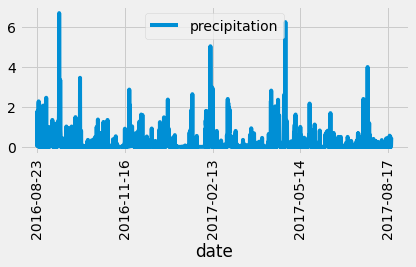

In [76]:
# Use Pandas Plotting with Matplotlib to plot the data
precipData.plot(rot=90)
plt.tight_layout()
plt.show()

In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipData.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Exploratory Station Analysis

In [80]:
# Design a query to calculate the number of stations in the dataset
uniqueStations = session.query(stations.station).count()
print(uniqueStations)

# query the total stations as well
totalStations = session.query(measurements.station).count()
totalStations

9


19550

In [88]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activeStations = session.query(measurements.station, func.count(measurements.station)).\
    group_by(measurements.station).\
    order_by(func.count(measurements.station).desc()).all()
activeStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [93]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest = session.query(measurements.station,func.min(measurements.prcp)).\
    filter_by(station = 'USC00519281').all()
print(lowest)

highest = session.query(measurements.station,func.max(measurements.prcp)).\
    filter_by(station = 'USC00519281').all()
print(highest)

average = session.query(measurements.station,func.avg(measurements.prcp)).\
    filter_by(station = 'USC00519281').all()
print(average)

[('USC00519281', 0.0)]
[('USC00519281', 9.64)]
[('USC00519281', 0.2123520923520915)]


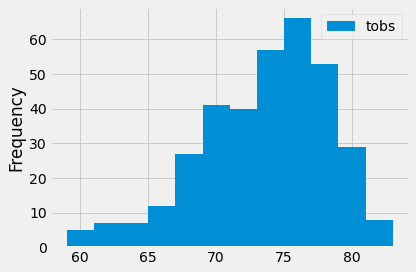

In [106]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mostActiveStation = session.query(measurements.tobs).\
    filter(measurements.station == 'USC00519281').\
    filter(measurements.date >= oneYear).all()
mostActiveStation

observations = pd.DataFrame(mostActiveStation,columns=['tobs'])
observations

observations.plot.hist(bins=12)
plt.tight_layout()
plt.show()

## Close Session

In [107]:
# Close Session
session.close()